# Garmin Run Data Analysis

ideas:
sleep data - predict wake up times. day of week, time analysis maybe, with runs, etc


mapping:
sleep data todos:
- load and join sleep csv's into one file. use glob?
- join it with activities
- clean/preprocess
feature engineering:
- day of week
- time of day (am/pm? hour of the day?)
- months
- rolling sum/avg?
- 


## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import glob

## Load the Data

In [2]:
activities = pd.read_csv('data/Activities.csv')
activities.head()

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,False,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,...,0.0,0:00,No,00:03:28.8,2,0.0,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,False,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,...,0.0,0:00,No,00:01:56.2,1,0.0,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,False,Tama Ward Running,5.51,344,00:32:08,150,171,154,...,0.0,0:00,No,00:03:01.3,6,0.0,00:32:03,00:33:33,16,40
3,Running,2024-05-07 18:39:11,False,Tama Ward Running,6.00,377,00:36:05,146,163,156,...,0.0,0:00,No,00:00:01.0,7,0.0,00:36:03,00:41:22,17,43
4,Running,2024-05-06 21:55:53,False,Tama Ward Running,1.68,99,00:10:17,135,150,149,...,0.0,0:00,No,00:04:06.6,2,0.0,00:10:11,00:10:39,20,41


In [ ]:
sleep1 = pd.read_csv('data/Sleep (1).csv')
sleep1

In [ ]:
path = 'data'
csv_files = glob.glob(path + '/*.csv')
csv_files 

In [22]:
df_list = []
for csv in csv_files:
    df = pd.read_csv(csv)
    df_list.append(df)

df_list

[   Sleep 4 Weeks   Duration   Bedtime Wake Time
 0          Sep 1         --        --        --
 1         Aug 31   9h 14min  11:18 PM   8:33 AM
 2         Aug 30   2h 48min   4:27 AM   7:15 AM
 3         Aug 29   7h 58min   1:13 AM   9:25 AM
 4         Aug 28    6h 6min   1:42 AM   8:29 AM
 5         Aug 27   8h 24min   2:16 AM  10:57 AM
 6         Aug 26  10h 10min  10:31 PM   8:46 AM
 7         Aug 25   6h 26min   1:31 AM   7:57 AM
 8         Aug 24   7h 32min  11:24 PM   7:51 AM
 9         Aug 23   7h 34min  12:11 AM   7:47 AM
 10        Aug 22   5h 12min   1:48 AM   7:00 AM
 11        Aug 21   5h 22min   2:36 AM   7:58 AM
 12        Aug 20   3h 55min   2:32 AM   6:28 AM
 13        Aug 19   5h 14min   2:49 AM   8:04 AM
 14        Aug 18   10h 4min   1:17 AM  11:21 AM
 15        Aug 17   5h 32min  12:49 AM   6:24 AM
 16        Aug 16         --        --        --
 17        Aug 15   4h 28min   1:21 AM   6:01 AM
 18        Aug 14  10h 20min  12:18 AM  10:43 AM
 19        Aug 13   

In [23]:
pd.concat(df_list)

,Sleep 4 Weeks,Duration,Bedtime,Wake Time,Activity Type,Date,Favorite,Title,Distance,Calories,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Sep 1,--,--,--,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aug 31,9h 14min,11:18 PM,8:33 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aug 30,2h 48min,4:27 AM,7:15 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aug 29,7h 58min,1:13 AM,9:25 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aug 28,6h 6min,1:42 AM,8:29 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Jan 27,8h 8min,12:12 AM,8:26 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Jan 26,7h 27min,11:38 PM,7:06 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Jan 25,8h 0min,--,8:01 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Jan 24,8h 9min,3:30 AM,11:41 AM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examining the Data

In [3]:
activities.shape

(983, 38)

In [4]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             983 non-null    object 
 1   Date                      983 non-null    object 
 2   Favorite                  983 non-null    bool   
 3   Title                     983 non-null    object 
 4   Distance                  983 non-null    float64
 5   Calories                  983 non-null    object 
 6   Time                      983 non-null    object 
 7   Avg HR                    983 non-null    int64  
 8   Max HR                    983 non-null    int64  
 9   Avg Run Cadence           983 non-null    object 
 10  Max Run Cadence           983 non-null    object 
 11  Avg Pace                  983 non-null    object 
 12  Best Pace                 983 non-null    object 
 13  Total Ascent              983 non-null    object 
 14  Total Desc

In [5]:
activities.describe(include='all')

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,...,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
count,983,983,983,983,983.000000,983,983,983.000000,983.000000,983,...,983.0,983,983,983,983.000000,983.0,983,983,983,983
unique,5,983,1,95,NaN,540,906,NaN,NaN,78,...,NaN,1,1,671,NaN,NaN,857,929,88,111
top,Running,2024-05-09 12:44:32,False,Tama Ward Running,NaN,15,00:25:50,NaN,NaN,156,...,NaN,0:00,No,00:00:01.4,NaN,NaN,00:00:00,00:37:01,4,40
freq,940,1,983,272,NaN,11,3,NaN,NaN,73,...,NaN,983,983,20,NaN,NaN,30,3,109,65
mean,NaN,NaN,NaN,NaN,5.585341,NaN,NaN,138.039674,159.587996,NaN,...,0.0,NaN,NaN,NaN,7.053917,0.0,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.468728,NaN,NaN,18.607191,20.573353,NaN,...,0.0,NaN,NaN,NaN,6.543614,0.0,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,NaN,1.000000,0.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.650000,NaN,NaN,131.000000,150.000000,NaN,...,0.0,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.010000,NaN,NaN,141.000000,163.000000,NaN,...,0.0,NaN,NaN,NaN,6.000000,0.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.640000,NaN,NaN,149.000000,174.000000,NaN,...,0.0,NaN,NaN,NaN,9.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
activities.describe(include='object')

,Activity Type,Date,Title,Calories,Time,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Dive Time,Surface Interval,Decompression,Best Lap Time,Moving Time,Elapsed Time,Min Elevation,Max Elevation
count,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983,983
unique,5,983,95,540,906,78,98,219,249,178,177,1,1,1,671,857,929,88,111
top,Running,2024-05-09 12:44:32,Tama Ward Running,15,00:25:50,156,167,--,--,--,--,0:00,0:00,No,00:00:01.4,00:00:00,00:37:01,4,40
freq,940,1,272,11,3,73,48,24,24,126,129,983,983,983,20,30,3,109,65


In [7]:
activities.isna().sum()

Activity Type               0
Date                        0
Favorite                    0
Title                       0
Distance                    0
Calories                    0
Time                        0
Avg HR                      0
Max HR                      0
Avg Run Cadence             0
Max Run Cadence             0
Avg Pace                    0
Best Pace                   0
Total Ascent                0
Total Descent               0
Avg Stride Length           0
Avg Vertical Ratio          0
Avg Vertical Oscillation    0
Avg Ground Contact Time     0
Training Stress Score®      0
Avg Power                   0
Max Power                   0
Grit                        0
Flow                        0
Avg. Swolf                  0
Avg Stroke Rate             0
Total Reps                  0
Dive Time                   0
Min Temp                    0
Surface Interval            0
Decompression               0
Best Lap Time               0
Number of Laps              0
Max Temp  

## Data Cleaning
- Our initial examination revealed that:
    - There seem to be no missing values
    - There are some columns with only 1 unique value
    - There are other columns irrelevant for this analysis
    - There are activities other than running included in the rows

### Remove columns with only 1 unique value

In [8]:
# Make a copy of activities for new dataframe
new_df = activities.copy()

# List of all columns
columns_to_check = list(new_df.columns)

# List up columns with only 1 unique value
same_columns = [column for column in columns_to_check if new_df[column].nunique() == 1]
print('Columns with all same values: ', len(same_columns))
print(same_columns)

# Make new dataframe with those columns dropped
new_df = new_df.drop(columns=same_columns)

# Check remaining columns
print('Remaining columns: ', len(new_df.columns))
print(new_df.columns)

Columns with all same values:  17
['Favorite', 'Avg Vertical Ratio', 'Avg Vertical Oscillation', 'Avg Ground Contact Time', 'Training Stress Score®', 'Avg Power', 'Max Power', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Max Temp']
Remaining columns:  21
Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace',
       'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length',
       'Best Lap Time', 'Number of Laps', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation'],
      dtype='object')


### Remove other irrelevant columns

In [9]:
# List up columns not useful for this analysis
irrelevant_columns = ['Number of Laps', 'Best Lap Time', 'Max Run Cadence', 'Best Pace']
print('Other irrelevant columns: ', len(irrelevant_columns))

# Drop irrelevant columns
new_df.drop(columns = irrelevant_columns, inplace=True)

# Check remaining columns
print('Remaining columns: ', len(new_df.columns))
print(new_df.columns)

Other irrelevant columns:  4
Remaining columns:  17
Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Run Cadence', 'Avg Pace', 'Total Ascent',
       'Total Descent', 'Avg Stride Length', 'Moving Time', 'Elapsed Time',
       'Min Elevation', 'Max Elevation'],
      dtype='object')


### Remove irrelevant rows

In [10]:
# Find irrelevant data
print('Unique values in Activity Type column: ', new_df['Activity Type'].unique())

# Select only Running activities
new_df = new_df[new_df['Activity Type'] == 'Running']
new_df

Unique values in Activity Type column:  ['Running' 'Other' 'Treadmill Running' 'Walking' 'Incident Detected']


,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Avg Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82,00:09:12.3,128,149,152,5:40,24,26,1.16,00:09:08,00:11:45,19,40
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16,00:01:56.2,128,150,142,5:33,--,--,1.27,00:01:50,00:02:27.8,23,55
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344,00:32:08,150,171,154,5:50,51,56,1.11,00:32:03,00:33:33,16,40
3,Running,2024-05-07 18:39:11,Tama Ward Running,6.00,377,00:36:05,146,163,156,6:01,69,64,1.07,00:36:03,00:41:22,17,43
4,Running,2024-05-06 21:55:53,Tama Ward Running,1.68,99,00:10:17,135,150,149,6:08,23,23,1.09,00:10:11,00:10:39,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Running,2020-08-15 16:31:46,Matsuyama Shi Running,3.44,213,00:17:28,150,163,159,5:05,49,50,1.24,00:17:19,00:17:28,1,45
978,Running,2020-08-11 22:19:18,Kochi Shi - Steady State Run,6.70,433,00:35:00,154,179,159,5:14,16,17,1.20,00:34:35,00:36:46,4,15
979,Running,2020-08-10 16:51:04,Shimanto Shi Running,4.24,280,00:22:14,155,167,155,5:14,23,21,1.23,00:21:09,00:23:19,2,14
981,Running,2020-08-10 16:39:55,Shimanto Shi - Easy Run,0.90,55,00:04:55.6,137,151,155,5:27,--,1,1.18,00:04:48,00:04:55.6,6,9


## Data Manipulation

### Convert datatypes

In [11]:
# Make a copy
dtype_df = new_df.copy()

#### Datetime objects

In [12]:
# Change Date column to datetime
dtype_df['Date'] = pd.to_datetime(dtype_df['Date'])

# Check
dtype_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 982
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity Type      940 non-null    object        
 1   Date               940 non-null    datetime64[ns]
 2   Title              940 non-null    object        
 3   Distance           940 non-null    float64       
 4   Calories           940 non-null    object        
 5   Time               940 non-null    object        
 6   Avg HR             940 non-null    int64         
 7   Max HR             940 non-null    int64         
 8   Avg Run Cadence    940 non-null    object        
 9   Avg Pace           940 non-null    object        
 10  Total Ascent       940 non-null    object        
 11  Total Descent      940 non-null    object        
 12  Avg Stride Length  940 non-null    float64       
 13  Moving Time        940 non-null    object        
 14  Elapsed Ti

In [13]:
# Change Avg Run Cadence to int



### Calculate derived columns

#### Time and paces to seconds

In [14]:
# Check value formats
print(dtype_df.head())

# List columns needing change to seconds
times_columns = ['Time', 'Moving Time', 'Elapsed Time', 'Avg Pace']

# Define function to change times to seconds
def change_to_seconds(times):
    '''
    Changes objects indicating time into total seconds.
    Deals with both hr:min:sec and min:sec formats. 
    '''
    if len(times.split(':')) == 3: 
        hr, min, sec = times.split(':')
        return float(hr)*3600 + float(min)*60 + float(sec)
    elif len(times.split(':')) == 2:
        min, sec = times.split(':')
        return float(min)*60 + float(sec)
    
# Apply to columns
for column in times_columns:
    dtype_df[column] = dtype_df[column].apply(change_to_seconds)
    
# Check
dtype_df

  Activity Type                Date              Title  Distance Calories  \
0       Running 2024-05-09 12:44:32  Tama Ward Running      1.63       82   
1       Running 2024-05-08 21:03:33  Tama Ward Running      0.35       16   
2       Running 2024-05-08 19:59:32  Tama Ward Running      5.51      344   
3       Running 2024-05-07 18:39:11  Tama Ward Running      6.00      377   
4       Running 2024-05-06 21:55:53  Tama Ward Running      1.68       99   

         Time  Avg HR  Max HR Avg Run Cadence Avg Pace Total Ascent  \
0  00:09:12.3     128     149             152     5:40           24   
1  00:01:56.2     128     150             142     5:33           --   
2    00:32:08     150     171             154     5:50           51   
3    00:36:05     146     163             156     6:01           69   
4    00:10:17     135     150             149     6:08           23   

  Total Descent  Avg Stride Length Moving Time Elapsed Time Min Elevation  \
0            26               1.1

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Avg Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82,552.3,128,149,152,340.0,24,26,1.16,548.0,705.0,19,40
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16,116.2,128,150,142,333.0,--,--,1.27,110.0,147.8,23,55
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344,1928.0,150,171,154,350.0,51,56,1.11,1923.0,2013.0,16,40
3,Running,2024-05-07 18:39:11,Tama Ward Running,6.00,377,2165.0,146,163,156,361.0,69,64,1.07,2163.0,2482.0,17,43
4,Running,2024-05-06 21:55:53,Tama Ward Running,1.68,99,617.0,135,150,149,368.0,23,23,1.09,611.0,639.0,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Running,2020-08-15 16:31:46,Matsuyama Shi Running,3.44,213,1048.0,150,163,159,305.0,49,50,1.24,1039.0,1048.0,1,45
978,Running,2020-08-11 22:19:18,Kochi Shi - Steady State Run,6.70,433,2100.0,154,179,159,314.0,16,17,1.20,2075.0,2206.0,4,15
979,Running,2020-08-10 16:51:04,Shimanto Shi Running,4.24,280,1334.0,155,167,155,314.0,23,21,1.23,1269.0,1399.0,2,14
981,Running,2020-08-10 16:39:55,Shimanto Shi - Easy Run,0.90,55,295.6,137,151,155,327.0,--,1,1.18,288.0,295.6,6,9


In [15]:
dtype_df

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Avg Pace,Total Ascent,Total Descent,Avg Stride Length,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2024-05-09 12:44:32,Tama Ward Running,1.63,82,552.3,128,149,152,340.0,24,26,1.16,548.0,705.0,19,40
1,Running,2024-05-08 21:03:33,Tama Ward Running,0.35,16,116.2,128,150,142,333.0,--,--,1.27,110.0,147.8,23,55
2,Running,2024-05-08 19:59:32,Tama Ward Running,5.51,344,1928.0,150,171,154,350.0,51,56,1.11,1923.0,2013.0,16,40
3,Running,2024-05-07 18:39:11,Tama Ward Running,6.00,377,2165.0,146,163,156,361.0,69,64,1.07,2163.0,2482.0,17,43
4,Running,2024-05-06 21:55:53,Tama Ward Running,1.68,99,617.0,135,150,149,368.0,23,23,1.09,611.0,639.0,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Running,2020-08-15 16:31:46,Matsuyama Shi Running,3.44,213,1048.0,150,163,159,305.0,49,50,1.24,1039.0,1048.0,1,45
978,Running,2020-08-11 22:19:18,Kochi Shi - Steady State Run,6.70,433,2100.0,154,179,159,314.0,16,17,1.20,2075.0,2206.0,4,15
979,Running,2020-08-10 16:51:04,Shimanto Shi Running,4.24,280,1334.0,155,167,155,314.0,23,21,1.23,1269.0,1399.0,2,14
981,Running,2020-08-10 16:39:55,Shimanto Shi - Easy Run,0.90,55,295.6,137,151,155,327.0,--,1,1.18,288.0,295.6,6,9


<AxesSubplot:>

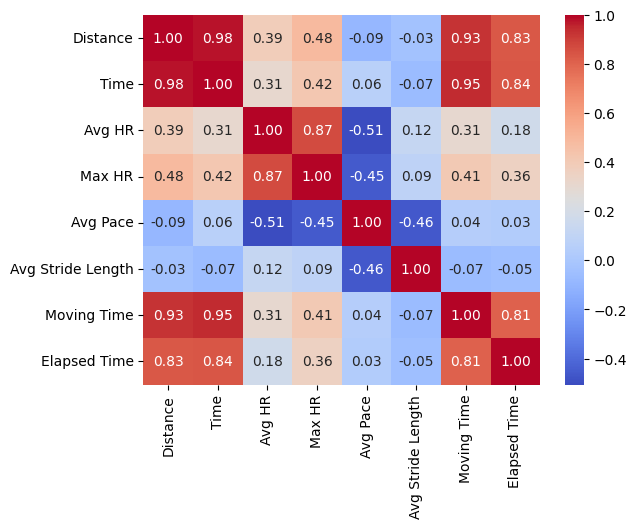

In [16]:
sns.heatmap(dtype_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [17]:
activities = pd.read_csv('data/Activities.csv')
activities

for i in range(len(activities['Time'])):
    hr, min, sec = activities['Time'][i].split(':')
    activities['Time'][i] = float(hr)*3600 + float(min)*60 + float(sec)
    return activities['Time'][i]
    
activities['Time'][0]

SyntaxError: 'return' outside function (980930121.py, line 7)

In [ ]:
# change Pace times to seconds (float)

def change_to_seconds(paces):
    for pace in paces:
        hr, min, sec = pace.split(':')
        pace = float(hr)*3600 + float(min)*60 + float(sec)
    
new_df['Time'] = new_df['Time'].apply(change_to_seconds)
#     activities['Time'][i] = hr*3600 + min*60 + sec

#### 

## Feature Engineering

In [ ]:
# Days of the week

activities['DayOfWeek'] = activities['Date'].dt.day_name()

In [ ]:
# sleep
# need to load data

In [ ]:


# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data
activities.plot(x='Date', y='Distance', kind='line', marker='o', ax=ax)

# Customize the plot
ax.set_title('Running Distance Over Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
activities.columns

In [ ]:
activities['Avg Pace'].unique

In [ ]:
activities['Activity Type'].unique()


In [ ]:
select_columns = ['Activity Type', 'Date', 'Title', 'Distance', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

new_df = activities[select_columns]
select_df = new_df.copy()
select_df.head(3)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# activities = pd.read_csv('your_file.csv')

select_columns = ['Activity Type', 'Date', 'Title', 'Distance', 'Calories',
                  'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
                  'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
                  'Avg Stride Length', 'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

# Create a new DataFrame with selected columns
new_df = activities[select_columns]

# Define a function to convert pace to total seconds
def pace_to_seconds(pace):
    if isinstance(pace, str):
        minutes, seconds = map(int, pace.split(':'))
        return minutes * 60 + seconds
    return pace

# Apply the function to convert 'Avg Pace' and 'Best Pace' to seconds
new_df['Avg Pace'] = new_df['Avg Pace'].apply(pace_to_seconds)
new_df['Best Pace'] = new_df['Best Pace'].apply(pace_to_seconds)

# Convert applicable columns to numeric, errors='coerce' will replace non-convertible values with NaN
columns_to_convert = ['Calories', 'Time', 'Avg Run Cadence', 'Max Run Cadence', 
                      'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 
                      'Moving Time', 'Elapsed Time', 'Min Elevation', 'Max Elevation']

for col in columns_to_convert:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

# Drop non-numeric columns
numeric_df = new_df.select_dtypes(include=[pd.np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Customize the heatmap
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [ ]:
new_df['Calories'] = pd.to_numeric(new_df['Calories'], errors='coerce')
new_df['Time'] = pd.to_numeric(new_df['Time'], errors='coerce')
new_df['Avg Run Cadence'] = pd.to_numeric(new_df['Avg Run Cadence'], errors='coerce')
new_df['Max Run Cadence'] = pd.to_numeric(new_df['Max Run Cadence'], errors='coerce')
new_df['Avg Pace'] = pd.to_numeric(new_df['Avg Pace'], errors='coerce')
new_df['Best Pace'] = pd.to_numeric(new_df['Best Pace'], errors='coerce')
new_df['Total Ascent'] = pd.to_numeric(new_df['Total Ascent'], errors='coerce')
new_df['Total Descent'] = pd.to_numeric(new_df['Total Descent'], errors='coerce')
new_df['Moving Time'] = pd.to_numeric(new_df['Moving Time'], errors='coerce')
new_df['Elapsed Time'] = pd.to_numeric(new_df['Elapsed Time'], errors='coerce')
new_df['Min Elevation'] = pd.to_numeric(new_df['Min Elevation'], errors='coerce')
new_df['Max Elevation'] = pd.to_numeric(new_df['Max Elevation'], errors='coerce')

new_df

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# activities = pd.read_csv('your_file.csv')

# Compute the correlation matrix
correlation_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Customize the heatmap
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [ ]:
new_df.dtypes

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convert 'Date' column to datetime
# activities['Date'] = pd.to_datetime(activities['Date'])

# # Create a new column for the month and year
# activities['Month'] = activities['Date'].dt.to_period('M')

# # Group by the new 'Month' column and sum the 'Distance' for each month
# monthly_totals = activities.groupby('Month')['Distance'].sum().reset_index()

# # Convert 'Month' back to a datetime type for plotting
# monthly_totals['Month'] = monthly_totals['Month'].dt.to_timestamp()

# # Set a style
# plt.style.use('seaborn-darkgrid')

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(14, 7))

# # Plot the data
# ax.plot(monthly_totals['Month'], monthly_totals['Distance'], marker='o')

# # Customize the plot
# ax.set_title('Monthly Running Distance Totals', fontsize=20, fontweight='bold')
# ax.set_xlabel('Month', fontsize=15)
# ax.set_ylabel('Distance (km)', fontsize=15)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.grid(True, linestyle='--', alpha=0.7)

# # Show the plot
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Create a new column for the month and year
activities['Month'] = activities['Date'].dt.to_period('M')

# Group by the new 'Month' column and sum the 'Distance' for each month
monthly_totals = activities.groupby('Month')['Distance'].sum().reset_index()

# Convert 'Month' back to a datetime type for plotting
monthly_totals['Month'] = monthly_totals['Month'].dt.to_timestamp()

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data as a bar graph with thicker bars
bar_width = 20  # Adjust this value to make the bars thicker
ax.bar(monthly_totals['Month'], monthly_totals['Distance'], width=bar_width, color='skyblue', align='center')

# Customize the plot
ax.set_title('Monthly Running Distance Totals', fontsize=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
activities['Date'] = pd.to_datetime(activities['Date'])

# Create a new column for the week
activities['Week'] = activities['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by the new 'Week' column and sum the 'Distance' for each week
weekly_totals = activities.groupby('Week')['Distance'].sum().reset_index()

# Set a style
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the data as a line graph
ax.plot(weekly_totals['Week'], weekly_totals['Distance'], marker='o', linestyle='-', color='b', label='Weekly Running Distance')

# Add a marker for the meniscus injury on 6/1/2023
injury_date = pd.Timestamp('2023-06-01')
injury_week = injury_date.to_period('W').start_time
injury_distance = weekly_totals[weekly_totals['Week'] == injury_week]['Distance'].values[0]
ax.axvline(injury_date, color='r', linestyle='--', label='Meniscus Injury')
ax.scatter(injury_date, injury_distance, color='r', zorder=5)

# Customize the plot
ax.set_title('Weekly Running Distance Totals', fontsize=20, fontweight='bold')
ax.set_xlabel('Week', fontsize=15)
ax.set_ylabel('Distance (km)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Show the plot
plt.show()
